# word2vecで単語分類

## ライブラリのインストール

word2vecのためのライブラリ

In [4]:
!pip install gensim

matplotlibで日本語を使うためのライブラリ

In [3]:
!pip install japanize-matplotlib

  Using cached japanize_matplotlib-1.1.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


## ライブラリのインポート
word2vec用

In [1]:
from gensim.models import word2vec

## ライブラリのインポート
グラフ表示用

In [2]:
import matplotlib.pyplot as plt
import japanize_matplotlib

## 作品名の設定

In [3]:
book_name = 'momotaro'

## word2vecの実行

In [4]:
data = word2vec.LineSentence(book_name+'_train.txt')
model = word2vec.Word2Vec(data,vector_size=20, window=10, hs=1, min_count=2, sg=1)

## 各単語のベクトルの取得とリスト化

In [5]:
#words = ['桃太郎','犬','猿','きじ','きび','鬼','じい','ばあ','島']
words = ['桃太郎','犬','猿','きじ','きび','だんご','鬼','じい','ばあ','島','川','宝物']
#words = ['桃太郎','犬','猿','きじ','きび','だんご','鬼','じい','ばあ','島','川','家来','宝物','家来','海','船']
#words = ['桃太郎','犬','猿','きじ','きび','だんご','鬼','じい','ばあ','島','川','家来','宝物','家来','海','船','花','約束','命','岩','風','波']
wv = []

for s in words:
  wv.append(model.wv[s])

## 主成分分析による表示

In [6]:
from sklearn.decomposition import PCA
pca = PCA()  # PCA を行ったり PCA の結果を格納したりするための変数を、pca として宣言
pca.fit(wv)  # PCA を実行

PCA()

In [7]:
score = pca.transform(wv)

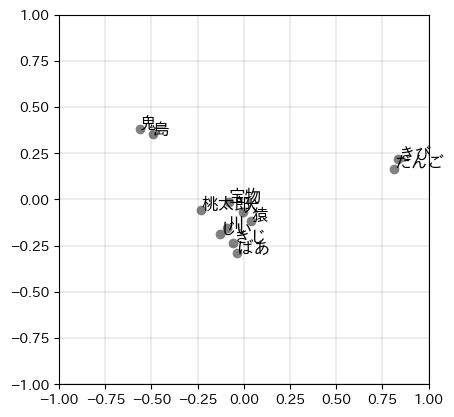

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')

plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.xlim(-1,1)
plt.ylim(-1,1)
for i in range(len(score)):
  plt.scatter(score[i][0],score[i][1],c="grey")
  plt.text(score[i][0],score[i][1],words[i],fontsize='large')

plt.savefig(book_name+'.pdf')
plt.savefig(book_name+'.png')
plt.show()

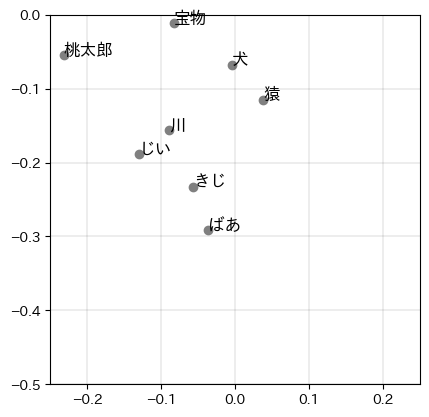

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')

plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.xlim(-0.25,0.25)
plt.ylim(-0.5,0.0)
for i in range(len(score)):
    if words[i] != 'きび' and words[i] != 'だんご' and words[i] != '鬼' and words[i] != '島':
        plt.scatter(score[i][0],score[i][1],c="grey")
        plt.text(score[i][0],score[i][1],words[i],fontsize='large')

plt.savefig(book_name+'_su.pdf')
plt.savefig(book_name+'_su.png')
plt.show()

##　【参考】単語に近いものを探す

In [9]:
 model.wv.most_similar('桃太郎')

[('車', 0.9781535267829895),
 ('じぎ', 0.9774662256240845),
 ('川', 0.9766480922698975),
 ('かかえ', 0.9762831926345825),
 ('間', 0.9756273031234741),
 ('洗濯', 0.9745736718177795),
 ('国', 0.9744817614555359),
 ('た', 0.9727314114570618),
 ('どちら', 0.9724754095077515),
 ('見', 0.9718580842018127)]